In [8]:
import pandas as pd
import random
import time

traits = {
    'MP:0004738': None,  
    'MP:0002638': None,  
    'MP:0000376': None,
    'MP:0003449': None,
    'MP:0000410': None,
    'MP:0000923': None,
    'MP:0001713': None,
    'MP:0002276': None,
    'MP:0001191': None,
    'MP:0000130': None
}

fitness_df = pd.read_csv('fitness.csv')
for index, row in fitness_df.iterrows():
    mp_id = row['id']
    fitness_score = row['fitness_score']
    if mp_id in traits:
        traits[mp_id] = fitness_score
        
        
class Rat:
    id_counter = 1
    
    def __init__(self, genome=None, parent1=None, parent2=None):
        self.genome = genome if genome else random.sample(list(traits.keys()), 10)
        self.parent1 = parent1
        self.parent2 = parent2
        self.id = Rat.unique_id() 
        
    @classmethod
    def unique_id(cls):
        current_id = cls.id_counter
        cls.id_counter += 1  # Increment the ID counter
        return current_id

    def fitness(self):
        return sum(traits[trait] for trait in self.genome if traits[trait] is not None) / len(self.genome)
    
random.seed(42)
num_rats = 20  
population = [Rat() for _ in range(num_rats)]

for i, rat in enumerate(population, 1):
    print(f"Rat {i}: Genome: {rat.genome}, Fitness: {rat.fitness():.2f}")


Rat 1: Genome: ['MP:0002638', 'MP:0004738', 'MP:0000410', 'MP:0000130', 'MP:0001713', 'MP:0000923', 'MP:0001191', 'MP:0000376', 'MP:0003449', 'MP:0002276'], Fitness: -3.20
Rat 2: Genome: ['MP:0004738', 'MP:0000130', 'MP:0002638', 'MP:0002276', 'MP:0001713', 'MP:0000410', 'MP:0001191', 'MP:0000376', 'MP:0003449', 'MP:0000923'], Fitness: -3.20
Rat 3: Genome: ['MP:0003449', 'MP:0002276', 'MP:0000410', 'MP:0001713', 'MP:0004738', 'MP:0002638', 'MP:0000130', 'MP:0001191', 'MP:0000376', 'MP:0000923'], Fitness: -3.20
Rat 4: Genome: ['MP:0003449', 'MP:0000923', 'MP:0002638', 'MP:0004738', 'MP:0000130', 'MP:0001713', 'MP:0000376', 'MP:0002276', 'MP:0001191', 'MP:0000410'], Fitness: -3.20
Rat 5: Genome: ['MP:0002276', 'MP:0001191', 'MP:0002638', 'MP:0003449', 'MP:0004738', 'MP:0000410', 'MP:0000376', 'MP:0001713', 'MP:0000130', 'MP:0000923'], Fitness: -3.20
Rat 6: Genome: ['MP:0002638', 'MP:0004738', 'MP:0003449', 'MP:0001713', 'MP:0000376', 'MP:0001191', 'MP:0000130', 'MP:0000410', 'MP:0002276'

In [22]:
def generate_newick_mapping(population, newick_map):
    for rat in population:
        if rat.parent1 is None or rat.parent2 is None:
            newick_map[rat.id] = str(rat.id)  # Use rat's ID for initial generation
        else:
            # Fetch or default to parent IDs if Newick strings are not available
            parent1_newick = newick_map.get(rat.parent1.id, str(rat.parent1.id))
            parent2_newick = newick_map.get(rat.parent2.id, str(rat.parent2.id))
            newick_map[rat.id] = f"({parent1_newick},{parent2_newick})"
    return newick_map


# Initialize an empty Newick map
newick_map = {}


def mate(rat1, rat2):
    child_genome = rat1.genome[:5] + rat2.genome[5:]
    if random.random() < mutation_rate:
        child_genome[random.randint(0, 9)] = random.choice(list(traits.keys()))
    return Rat(genome=child_genome, parent1=rat1, parent2=rat2)

generations = 5
mutation_rate = 0.05 

for _ in range(generations):    
    population.sort(key=lambda rat: rat.fitness(), reverse=True)
    breeding_population = population[:num_rats // 2]

    next_generation = []
    while len(next_generation) < num_rats:
        parent1, parent2 = random.sample(breeding_population, 2)
        child = mate(parent1, parent2)
        next_generation.append(child)

    population = next_generation
    newick_map = generate_newick_mapping(population, newick_map)

average_fitness = sum(rat.fitness() for rat in population) / num_rats
print("Average fitness of final generation:", average_fitness)

final_generation_tree = newick_map[population[-1].id] + ";"

print(final_generation_tree)

Average fitness of final generation: -1.06
(((((120,114),(120,111)),((104,102),(120,111))),(((104,102),(105,111)),((112,106),(105,111)))),((((112,106),(105,111)),((104,106),(104,102))),(((104,102),(120,111)),((104,102),(120,111)))));


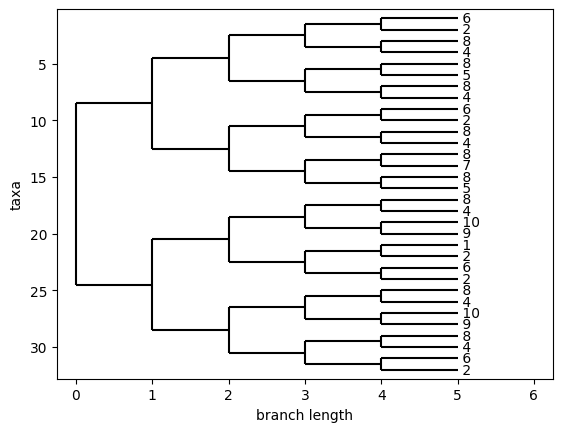

<Figure size 640x480 with 0 Axes>

In [21]:
from Bio import Phylo
import matplotlib.pyplot as plt
import io

# Assuming final_generation_tree is your Newick string
newick_string = final_generation_tree

# Parse the Newick string
tree = Phylo.read(io.StringIO(newick_string), "newick")

# Plot the tree
Phylo.draw(tree)

# Optionally, save the plot to a file
plt.savefig("tree_visualization.png")